<a href="https://colab.research.google.com/github/Alex86Mart/Alex86Mart/blob/main/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Цель исследования

Исследовать поведение пользователей в обновлённом приложении

ГИПОТЕЗА 1.

По идее, должна быть разница в поведении групп, которые проходят и не проходят обучение. Но так ли это? Влияет ли обучение на скорость прохождения других этапов игры?

ГИПОТЕЗА 2.

Кажется, повторное прохождение обучения положительно влияет на оплату, верно?

ГИПОТЕЗА 3.

Если пользователь сначала выбирает сложность, будет ли он потом проходить обучение?

**ЗАДАЧИ:**

1.Определить, насколько обучение сокращает время прохождения этапов игры.

2.Доказать, что успешное обучение само по себе влияет на оплату и не имеет значения то, каким этапом оно шло.

3.Определить, насколько прозрачен процесс взаимодействия с игрой.

**КОНКРЕТНЫЕ ШАГИ(ФОРМАЛИЗОВАННЫЕ ЗАДАЧИ):**

1.Сравнить время прохождения различных этапов для пользователей, которые завершили обучение, и пользователей, не начинавших обучение. Если показатель отличается, выяснить, насколько.

2.Проверить, существует ли зависимость между вероятностью оплаты вопросов и количеством обучений, которые начинал или завершал пользователь.

3.Выяснить, как часто пользователи начинают обучение после выбора уровня сложности. Это позволит оценить прозрачность процесса взаимодействия с игрой: если пользователи после выбора уровня сложности обращаются к обучению, значит, работа с приложением непонятна.

# Знакомство с данными

In [ ]:
# Импорт библиотеки pandas:
import pandas as pd
# Импортируем библиотеку matplotlib:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Считываем файл 7_4_Events, знакомимся с данными
events = pd.read_csv('data/7_4_Events.csv', sep = ',')
print(events)

            id       event_type selected_level           start_time  \
0        28903     registration            NaN  2016-05-11T23:40:55   
1        28904     registration            NaN  2016-05-11T23:49:58   
2        28905     registration            NaN  2016-05-12T00:53:07   
3        28906   tutorial_start            NaN  2016-05-12T01:32:20   
4        28907  tutorial_finish            NaN  2016-05-12T01:34:53   
...        ...              ...            ...                  ...   
252329  281232     level_choice           hard  2020-07-02T10:02:15   
252330  281233     level_choice         medium  2020-07-02T11:38:52   
252331  281234      pack_choice            NaN  2020-07-02T11:42:14   
252332  281235   tutorial_start            NaN  2020-07-02T13:32:58   
252333  281236  tutorial_finish            NaN  2020-07-02T13:36:36   

        tutorial_id  user_id  
0               NaN    12583  
1               NaN    12584  
2               NaN    12585  
3           17562.0    

In [ ]:
# Считываем файл 7_4_Purchase, знакомимся с данными
purchase = pd.read_csv('data/7_4_Purchase.csv', sep=',')
print(purchase)

         id  user_id       event_datetime  amount
0     15674    12584  2016-05-12T10:34:16     100
1     15675    12985  2016-05-13T08:25:56      50
2     15676    12828  2016-05-13T16:33:46      50
3     15677    12598  2016-05-14T01:09:37     150
4     15678    13037  2016-05-14T01:24:46     100
...     ...      ...                  ...     ...
5951  21625    87331  2020-07-06T09:02:07      50
5952  21626    87418  2020-07-06T14:16:37     100
5953  21627    87431  2020-07-06T22:48:59      50
5954  21628    87363  2020-07-07T05:38:56     100
5955  21629    87466  2020-07-08T01:59:21      50

[5956 rows x 4 columns]


In [ ]:
# Проверяем данные(типы данных, наличие пропусков)
events.info()

purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252334 entries, 0 to 252333
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              252334 non-null  int64  
 1   event_type      252334 non-null  object 
 2   selected_level  31086 non-null   object 
 3   start_time      252334 non-null  object 
 4   tutorial_id     125103 non-null  float64
 5   user_id         252334 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 11.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5956 entries, 0 to 5955
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              5956 non-null   int64 
 1   user_id         5956 non-null   int64 
 2   event_datetime  5956 non-null   object
 3   amount          5956 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 186.3+ KB


In [ ]:
# Чтобы всегда можно было свериться с исходными данными, будем работать с копиями
events_df = events.copy()
purchase_df = purchase.copy()

# Подготовка датафреймов к анализу

In [ ]:
# Отфильтровывать как строки
cond = (events_df.start_time >='2018-01-01') & (events_df.start_time <'2018-12-31') & (events_df.event_type=='registration')

# Составлять список user_id, удовлетворяющих условиям
registered = events_df[cond]['user_id'].to_list()

# Отфильтровать датасет по списку
events_df = events_df[events_df.user_id.isin(registered)]

# Перевести дату в формат datetime
events_df.start_time = pd.to_datetime(events_df.start_time, format='%Y-%m-%dT%H:%M:%S')

# Добавим в датафрейм purchase_df столбец event_type, который будет содержать одно значение purchase.
# Это нужно, чтобы в объединённом датафрейме однозначно выделить события оплаты.
purchase_df['event_type'] = 'purchase'

# Обработаем этот датафрейм так же, как и предыдущий
purchase_df = purchase_df[purchase_df.user_id.isin(registered)]
purchase_df.event_datetime = pd.to_datetime(purchase_df.event_datetime, format='%Y-%m-%dT%H:%M:%S')

# У нас есть одинаковые столбцы id в двух датафреймах, но столбец id в events_df указывает на идентификатор события,
# а столбец id в purchase_df — на идентификатор оплаты.
# Поэтому применим функцию rename(), чтобы переименовать столбцы в датафреймах.
events_df = events_df.rename(columns={'id':'event_id'})
purchase_df = purchase_df.rename(columns={'id':'purchase_id'})
purchase_df = purchase_df.rename(columns={'event_datetime':'start_time'})

In [ ]:
# Теперь, когда мы изучили оба файла, можем свести их в один.
total_df = pd.concat([events_df,purchase_df],sort=False)
total_df = total_df.reset_index(drop=True).sort_values('start_time')
total_df.head()

,event_id,event_type,selected_level,start_time,tutorial_id,user_id,purchase_id,amount
0,80308.0,registration,NaN,2018-01-01 03:48:40,NaN,27832,NaN,NaN
1,80309.0,registration,NaN,2018-01-01 04:07:25,NaN,27833,NaN,NaN
2,80310.0,registration,NaN,2018-01-01 08:35:10,NaN,27834,NaN,NaN
3,80311.0,registration,NaN,2018-01-01 11:54:47,NaN,27835,NaN,NaN
4,80312.0,registration,NaN,2018-01-01 13:28:07,NaN,27836,NaN,NaN


Данные для анализа подготовлены.

# Гипотеза 1

По идее, должна быть разница в поведении групп, которые проходят и не проходят обучение. Но так ли это? Влияет ли обучение на скорость прохождения других этапов игры?

**Сначала изучим событие registration**

In [ ]:
# Сколько пользователей его прошли и все ли пользователи регистрировались?:
total_df[total_df['event_type'] == 'registration']['user_id'].nunique()

19914

In [ ]:
total_df['user_id'].nunique()

19914

In [ ]:
# Зарегистрироваться можно только один раз.
total_df[total_df["event_type"] == "registration"]["user_id"].value_counts().mean()

1.0

In [ ]:
# Посмотрим на срез данных по событию tutorial_start.
total_df[total_df['event_type'] == 'tutorial_start'].head(10)

,event_id,event_type,selected_level,start_time,tutorial_id,user_id,purchase_id,amount
7,80315.0,tutorial_start,NaN,2018-01-01 14:54:40,31505.0,27836,NaN,NaN
8,80316.0,tutorial_start,NaN,2018-01-01 15:00:51,31506.0,27835,NaN,NaN
10,80318.0,tutorial_start,NaN,2018-01-01 15:40:43,31507.0,27836,NaN,NaN
12,80320.0,tutorial_start,NaN,2018-01-01 17:47:40,31508.0,27833,NaN,NaN
15,80323.0,tutorial_start,NaN,2018-01-01 19:11:36,31509.0,27839,NaN,NaN
17,80325.0,tutorial_start,NaN,2018-01-01 19:46:11,31510.0,27834,NaN,NaN
29,80337.0,tutorial_start,NaN,2018-01-02 02:07:07,31511.0,27840,NaN,NaN
30,80338.0,tutorial_start,NaN,2018-01-02 03:03:44,31512.0,27845,NaN,NaN
32,80340.0,tutorial_start,NaN,2018-01-02 04:55:11,31513.0,27842,NaN,NaN
41,80349.0,tutorial_start,NaN,2018-01-02 07:08:00,31514.0,27845,NaN,NaN


In [ ]:
# И на количество пользователей, которые прошли этот этап:
total_df[total_df['event_type'] == 'tutorial_start']['user_id'].nunique()

11852

In [ ]:
# Посмотрим на количество пользователей, которые совершают событие tutorial_finish:
total_df[total_df['event_type'] == 'tutorial_finish']['user_id'].nunique()

10244

Как мы видим, число пользователей, которые закончили обучение, существенно меньше, чем число пользователей, прошедших регистрацию.

In [ ]:
# Давайте определим процент пользователей, которые закончили обучение, и запишем его в переменную
# percent_tutorial_finish_users.
registered_users_count = total_df[total_df["event_type"] == "registration"][
    "user_id"
].nunique()
tutorial_finish_users_count = total_df[total_df["event_type"] == "tutorial_finish"][
    "user_id"
].nunique()
percent_tutorial_finish_users = tutorial_finish_users_count / registered_users_count
print(
    "Процент пользователей, закончивших обучение (от общего числа зарегистрировавшихся): {:.2%}".format(
        percent_tutorial_finish_users
    )
)

Процент пользователей, закончивших обучение (от общего числа зарегистрировавшихся): 51.44%


In [ ]:
# Выпишем всех пользователей, начавших обучение
tutorial_start_df = total_df[total_df["event_type"] == "tutorial_start"][
    "user_id"].unique()

In [ ]:
# Выпишем всех пользователей, завершивших обучение
tutorial_finish_df = total_df[total_df["event_type"] == "tutorial_finish"][
    "user_id"].unique()

In [ ]:
# Возьмем общий файл и построим сводную таблицу по этапам, учитывая только первые попытки пройти тот или иной этап:
user_time_table = total_df.pivot_table (values = ['start_time'], \
                                               index = ['user_id'], columns = ['event_type'], aggfunc = 'min')
user_time_table.reset_index(inplace = True)

# Проверим данные на целостность:
len(user_time_table) == total_df['user_id'].nunique()

True

In [ ]:
# Для дальнейшего удобства переименуем колонки и посмотрим на данные:
user_time_table.columns = ['user_id', 'level_choice', 'pack_choice', 'purchase', 'registration', \
                           'tutorial_finish', 'tutorial_start']
user_time_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19914 entries, 0 to 19913
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          19914 non-null  int64         
 1   level_choice     8338 non-null   datetime64[ns]
 2   pack_choice      5735 non-null   datetime64[ns]
 3   purchase         1600 non-null   datetime64[ns]
 4   registration     19914 non-null  datetime64[ns]
 5   tutorial_finish  10244 non-null  datetime64[ns]
 6   tutorial_start   11852 non-null  datetime64[ns]
dtypes: datetime64[ns](6), int64(1)
memory usage: 1.1 MB


Таким образом, у нас появилась возможность посмотреть, какая разница между этапами у пользователей с обучением  и без него. Но сначала сделаем столбец "группа". Присвоим "not_trained", если обучения не было, "trained", если оно закончено, и "other", если начато, но не закончено.

Сперва напишем функцию, которая будет присваивать нужное значение пользователю, а затем применим ее к датасету.

In [ ]:
def user_group(idx):
    if idx in tutorial_finish_df:
        return 'trained'
    elif idx in tutorial_start_df:
        return 'other'
    else:
        return 'not_trained'

In [ ]:
user_time_table['user_group'] = user_time_table['user_id'].apply(user_group)
user_time_table.head()

,user_id,level_choice,pack_choice,purchase,registration,tutorial_finish,tutorial_start,user_group
0,27832,NaT,NaT,NaT,2018-01-01 03:48:40,NaT,NaT,not_trained
1,27833,NaT,NaT,NaT,2018-01-01 04:07:25,2018-01-01 17:50:08,2018-01-01 17:47:40,trained
2,27834,NaT,NaT,NaT,2018-01-01 08:35:10,2018-01-01 19:48:01,2018-01-01 19:46:11,trained
3,27835,2018-01-01 20:37:22,2018-01-01 20:38:43,NaT,2018-01-01 11:54:47,2018-01-01 15:06:15,2018-01-01 15:00:51,trained
4,27836,NaT,NaT,NaT,2018-01-01 13:28:07,2018-01-01 15:42:58,2018-01-01 14:54:40,trained


Сгруппируем пользователей согласно присвоенным меткам и посмотрим на количество людей во всех трех группах на диаграмме.

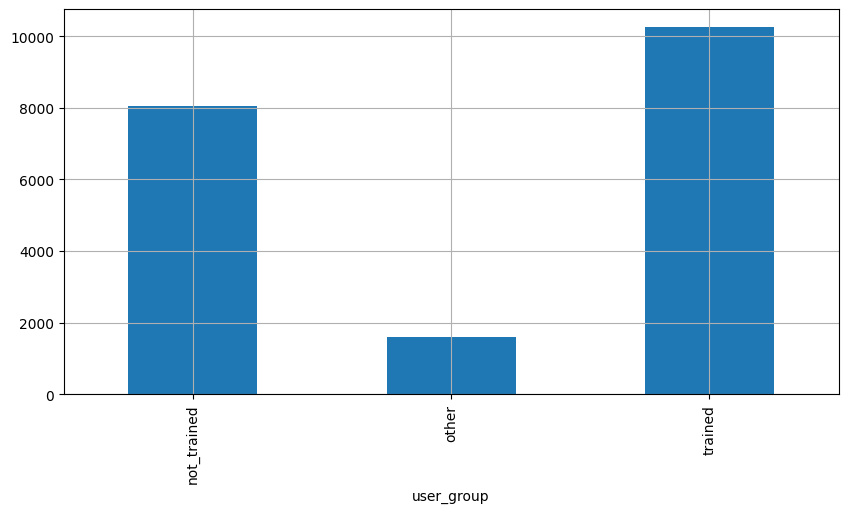

In [ ]:
grouped_ids = user_time_table.groupby(["user_group"])["user_id"].count()

grouped_ids.plot(
    kind='bar',
    grid=True,
    figsize=(10, 5)
);

По диаграмме получается, что большинство пользователей не только начало, но и завершило обучение.

Дополним нашу таблицу несколькими столбцами, которые содержат время между этапами.

In [ ]:
# Между этапом регистрации и этапом выбора уровня сложности
user_time_table['time_for_level_choice'] = round((user_time_table['registration'] - user_time_table['level_choice']).dt.seconds, 2)

# Между этапом выбора уровня сложности и этапом выбора бесплатного пакета вопросов
user_time_table['time_for_pack_choice'] = round((user_time_table['pack_choice'] - user_time_table['level_choice']).dt.seconds, 2)

# Между этапом выбора бесплатного пакета вопросов и этапом оплаты дополнительного пакета вопросов
user_time_table['time_for_purchase'] = round((user_time_table['purchase'] - user_time_table['pack_choice']).dt.seconds, 2)

# Посмотрим на получившиеся данные
user_time_table.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19914 entries, 0 to 19913
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                19914 non-null  int64         
 1   level_choice           8338 non-null   datetime64[ns]
 2   pack_choice            5735 non-null   datetime64[ns]
 3   purchase               1600 non-null   datetime64[ns]
 4   registration           19914 non-null  datetime64[ns]
 5   tutorial_finish        10244 non-null  datetime64[ns]
 6   tutorial_start         11852 non-null  datetime64[ns]
 7   user_group             19914 non-null  object        
 8   time_for_level_choice  8338 non-null   float64       
 9   time_for_pack_choice   5735 non-null   float64       
 10  time_for_purchase      1600 non-null   float64       
dtypes: datetime64[ns](6), float64(3), int64(1), object(1)
memory usage: 1.7+ MB


In [ ]:
# Для всех периодов выберем медианное время перехода от этапа к этапу для всех трех групп пользователей.

# Для перехода к выбору уровня
grouped_time0 = user_time_table.groupby(["user_group"])["time_for_level_choice"].median()

# Для перехода к выбору бесплатного пакета вопросов
grouped_time1 = user_time_table.groupby(["user_group"])["time_for_pack_choice"].median()

# Для перехода к оплате
grouped_time2 = user_time_table.groupby(["user_group"])["time_for_purchase"].median()

# Для всех периодов
grouped_time = user_time_table.groupby(["user_group"])[["time_for_level_choice", "time_for_pack_choice", "time_for_purchase"]].median()

# Если бы мы хотели исключить группу other, то выполнили бы код ниже:
# grouped_time = grouped_time.iloc [[0, 2]]

In [ ]:
# Для удобства построения диаграмм транспонируем нашу таблицу:
grouped_time = grouped_time.T

In [ ]:
# И для удобства оценки переведем получившиемя секунды в часы.
grouped_time[['not_trained', 'other', 'trained']] = round(grouped_time[['not_trained', 'other', 'trained']]/3600, 2)

# Выведем таблицу:
display(grouped_time)

user_group,not_trained,other,trained
time_for_level_choice,19.07,16.82,18.04
time_for_pack_choice,0.08,0.08,0.08
time_for_purchase,9.53,12.46,12.11


Построим столбчатую диограмму согласно таблице

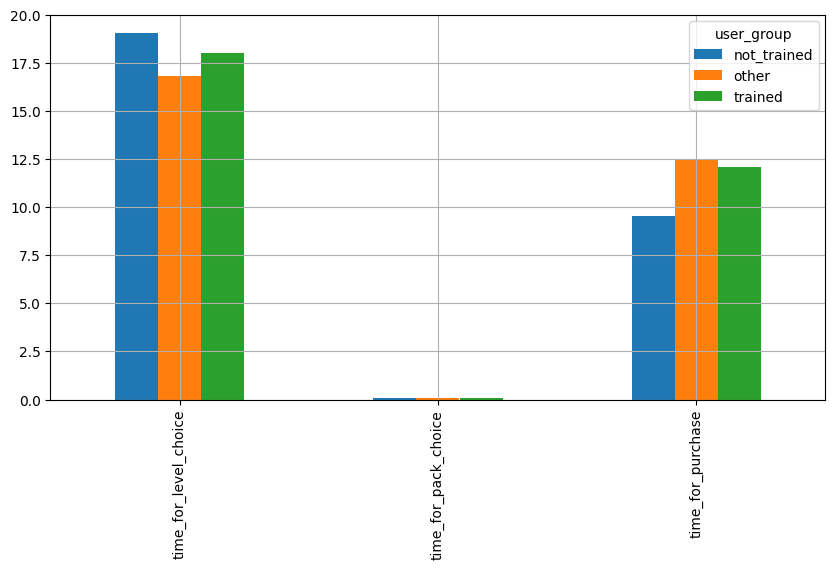

In [ ]:
grouped_time.plot(
    kind='bar',
    grid=True,
    figsize=(10, 5)
);

Из графика и таблицы мы видим, что группа, которая ни разу не проходила обучение, дольше (примерно на час) переходят к этапу выбора уровня сложности, но меньше (чуть больше, чем на 2 часа) — на переход к оплате.

# Вывод:

Пользователи, закончившие обучение, тратят меньше времени на переход к выбору уровня сложности, и больше — на выбор бесплатного пакета вопросов и оплату.

# Гипотеза 2

Посмотрим, положительно ли влияет повторное прохождение обучения влияет на оплату.

Для этого соберем сводную таблицу, в которой посчитаем все типы событий у каждого пользователя.

In [ ]:
tutorial = total_df.pivot_table (values = ['start_time'], index = ['user_id'], \
                                        columns = ['event_type'], aggfunc = 'count', fill_value = 0).reset_index()
tutorial.columns = ['user_id', 'level_choice', 'pack_choice', 'purchase', 'registration', 'tutorial_finish', 'tutorial_start']

In [ ]:
# Сгруппируем пользователей, которые начинали обучение, по фактам регистрации и оплаты

tutorial_repeat = tutorial.groupby(['tutorial_start'])[['registration', 'purchase']].agg(sum).reset_index()

C:\Users\iRU\AppData\Local\Temp\ipykernel_9056\288031414.py:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  tutorial_repeat = tutorial.groupby(['tutorial_start'])[['registration', 'purchase']].agg(sum).reset_index()


In [ ]:
# Посчитаем CR каждой группы (процент тех, кто заплатил)
tutorial_repeat['percent'] = round(tutorial_repeat['purchase']/tutorial_repeat['registration']*100, 1)
display(tutorial_repeat)

,tutorial_start,registration,purchase,percent
0,0,8062,22,0.3
1,1,9097,1207,13.3
2,2,1589,218,13.7
3,3,427,51,11.9
4,4,221,30,13.6
5,5,109,16,14.7
6,6,116,14,12.1
7,7,94,12,12.8
8,8,86,13,15.1
9,9,113,17,15.0


In [ ]:
# Посмотрим самый высокий процент:
tutorial_repeat[tutorial_repeat['percent'] == tutorial_repeat['percent'].max()]['tutorial_start']

8    8
Name: tutorial_start, dtype: int64

Построим диаграмму:

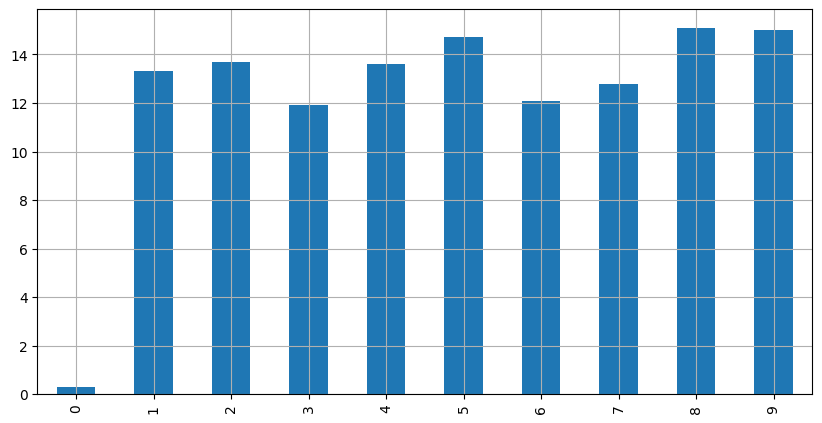

In [ ]:
tutorial_repeat['percent'].plot(
    kind='bar',
    grid=True,
    figsize=(10, 5)
);

Итак, лучше всего процент оплат у пользователей на восьмой попытке обучения.

## Вывод:

Повторное обучение положительно влияет на оплату. Гипотеза подтвердилась.

# Гипотеза 3

Если пользователь сначала выбирает уровень сложности, будет ли он потом проходить обучение?
Переформулируем гипотезу: перед началом исследования мы полагали, что наша игра простая и понятная, поэтому пользователи проходят обучение один раз и то не всегда.
После первых двух гипотез мы выяснили, что процент пользователей, которые проходили обучение, достаточно велик. Теперь, чтобы понять, прозрачна ли наша игра, нам надо выяснить, есть ли пользователи, которые перешли к обучению после выбора уровня сложности.

Предположим, что таких пользователей нет.

Сформируем сводную таблицу по самому позднему времени прохождения этапа.


In [ ]:
user_time_table_max = total_df.pivot_table (values = ['start_time'], \
                                               index = ['user_id'], columns = ['event_type'], aggfunc = max)
user_time_table_max.reset_index(inplace = True)
user_time_table_max.columns = ['user_id', 'level_choice', 'pack_choice', 'purchase', 'registration', \
                           'tutorial_finish', 'tutorial_start']

C:\Users\iRU\AppData\Local\Temp\ipykernel_9056\690647234.py:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  user_time_table_max = total_df.pivot_table (values = ['start_time'], \


In [ ]:
# Отфильтруем таблицу, оставив только тех пользователей,
# у которых время прохождения обучения больше, чем время выбора уровня сложности
user_time_table_thesis = user_time_table_max.loc[user_time_table_max['tutorial_start'] > user_time_table_max['level_choice']]

In [ ]:
# Для сравнения посчитаем, сколько у нас зарегистрированных пользователей (мы это уже делали, но для удобства введем переменную)
registered_users_count = total_df[total_df["event_type"] == "registration"][
    "user_id"
].nunique()

# И введем такую же переменную для пользователей, которые выбрали уровень сложности.
level_choice_users_count =  total_df[ total_events_df["event_type"] == "level_choice"][
    "user_id"
].nunique()

In [ ]:
# Посчитаем процент людей, у которых время прохождения обучения больше, чем время выбора уровня сложности,
# по отношению ко всем зарегистрированным пользователям:
percent_for_thesis = round(user_time_table_thesis["user_id"].nunique()/registered_users_count*100, 2)
print(
    "Процент пользователей, начавших обучение после выбора уровня сложности (от общего числа зарегистрировавшихся): {}%".format(
        percent_for_thesis
    )
)

Процент пользователей, начавших обучение после выбора уровня сложности (от общего числа зарегистрировавшихся): 6.96%


In [ ]:
# Посчитаем процент людей, у которых время прохождения обучения больше, чем время выбора уровня сложности,
# по отношению к пользователям, которые выбрали уровень сложности:

percent_confirmed_from_level_choice = round(user_time_table_thesis["user_id"].nunique()/level_choice_users_count*100, 2)
print(
    "Процент пользователей, начавших обучение после выбора уровня сложности (от общего числа выбравших уровень): {}%".format(
        percent_confirmed_from_level_choice
    )
)

Процент пользователей, начавших обучение после выбора уровня сложности (от общего числа выбравших уровень): 16.62%


# Выводы:

Людей, которые сначала выбрали уровень сложности, а потом перешли к обучению, действительно нет (нет такого пути). Однако достаточное количество людей, пройдя обучение и выбрав уровень сложности, вернулась к обучению снова. Это говорит нам о том, что, возможно, обучение недостаточно информативно. Стоит более пристально рассмотреть количество возвращающихся к обучению для полноценных выводов.